In [1]:
import pandas as pd
import numpy as np

# 랜덤 데이터 생성을 위한 시드값 설정
np.random.seed(42)

# 데이터 생성할 항목 설정
num_entries = 1000  # 총 데이터 수
user_ids = np.arange(1, 101)  # 100명의 사용자 ID
activities = ['Walking', 'Running', 'Cycling', 'Swimming']  # 운동 유형
dates = pd.date_range(start='2024-01-01', periods=num_entries, freq='H')  # 날짜와 시간

# 데이터 생성
data = {
    'UserID': np.random.choice(user_ids, num_entries),
    'Date': dates,
    'Activity': np.random.choice(activities, num_entries),
    'Steps': np.random.randint(100, 10000, num_entries),  # 걸음 수 (100~9999 사이)
    'CaloriesBurned': np.random.randint(50, 500, num_entries)  # 소모 칼로리 (50~499 사이)
}

# 데이터프레임 생성
fitness_data = pd.DataFrame(data)

# 데이터 미리보기
fitness_data.head()


C:\Users\j0708\AppData\Local\Temp\ipykernel_62620\3199391410.py:11: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  dates = pd.date_range(start='2024-01-01', periods=num_entries, freq='H')  # 날짜와 시간


,UserID,Date,Activity,Steps,CaloriesBurned
0,52,2024-01-01 00:00:00,Running,4386,350
1,93,2024-01-01 01:00:00,Cycling,3838,277
2,15,2024-01-01 02:00:00,Swimming,2569,233
3,72,2024-01-01 03:00:00,Swimming,4895,156
4,61,2024-01-01 04:00:00,Walking,6250,133


In [2]:
from dash import Dash, dcc, html
from dash.dependencies import Input, Output
import plotly.express as px
import pandas as pd

# Sample dataset creation
# Generate a small dataset for illustration
import numpy as np
np.random.seed(42)
num_entries = 100
activity_types = ['Walking', 'Running', 'Cycling', 'Swimming']
fitness_data = pd.DataFrame({
    'Activity': np.random.choice(activity_types, num_entries),
    'Hour': np.random.randint(0, 24, num_entries),
    'Steps': np.random.randint(100, 10000, num_entries),
    'CaloriesBurned': np.random.randint(50, 500, num_entries)
})

# Initialize the Dash app
app = Dash(__name__)

app.layout = html.Div([
    html.H1("Exercise Data Analysis Dashboard"),
    html.Label("Select Activity Type:"),
    dcc.Dropdown(
        id='activity-dropdown',
        options=[{'label': activity, 'value': activity} for activity in fitness_data['Activity'].unique()],
        value='Walking'
    ),
    html.Label("Select Hour of the Day:"),
    dcc.Slider(
        id='hour-slider',
        min=0,
        max=23,
        step=1,
        value=12,
        marks={i: f'{i}:00' for i in range(0, 24, 3)}
    ),
    dcc.Graph(id='steps-calories-graph')
])

# Define the callback to update the graph based on user input
@app.callback(
    Output('steps-calories-graph', 'figure'),
    [Input('activity-dropdown', 'value'), Input('hour-slider', 'value')]
)
def update_graph(selected_activity, selected_hour):
    filtered_data = fitness_data[(fitness_data['Activity'] == selected_activity) & (fitness_data['Hour'] == selected_hour)]
    fig = px.histogram(filtered_data, x="Steps", y="CaloriesBurned", title=f"{selected_activity} at {selected_hour}:00")
    return fig

if __name__ == '__main__':
    app.run_server(debug=True)


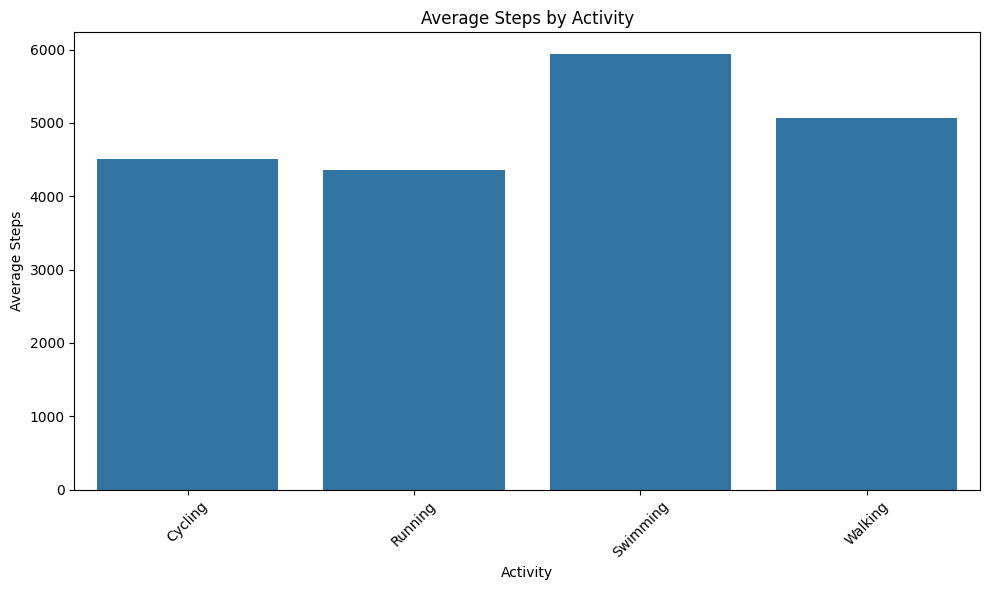

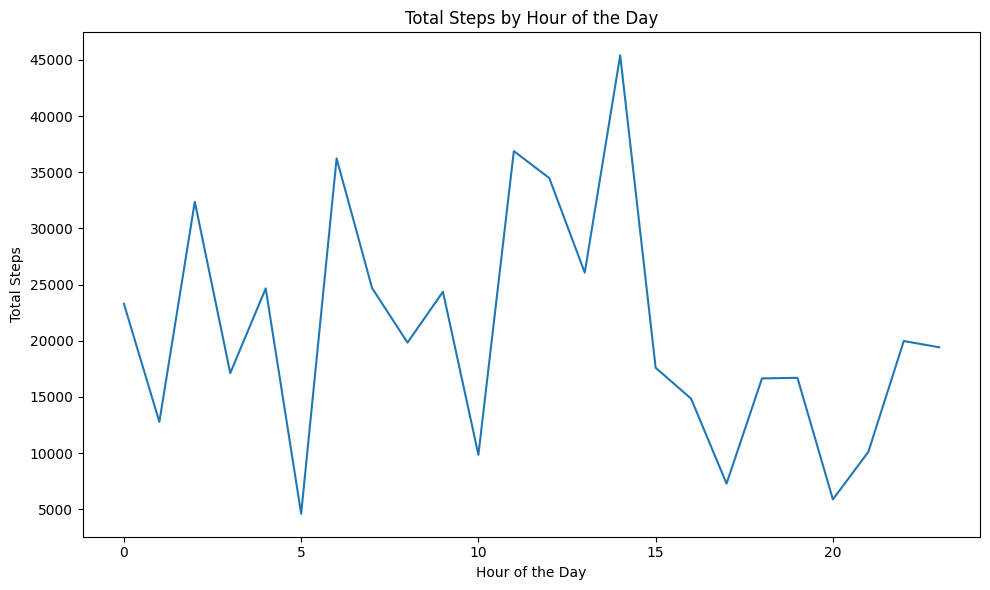

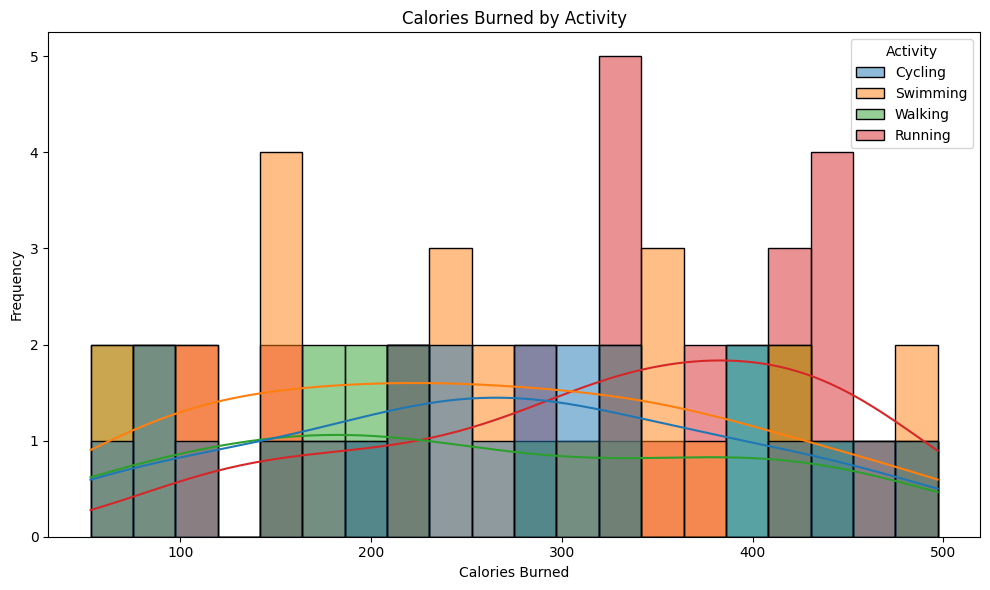

In [5]:
import matplotlib.pyplot as plt  # Importing matplotlib for plotting
import seaborn as sns  # Importing seaborn for enhanced visualizations
import pandas as pd

# Assume 'fitness_data' is already loaded and available

# 1. Average Steps by Activity
plt.figure(figsize=(10, 6))
activity_avg_steps = fitness_data.groupby('Activity')['Steps'].mean().reset_index()
sns.barplot(x='Activity', y='Steps', data=activity_avg_steps)
plt.title('Average Steps by Activity')
plt.xlabel('Activity')
plt.ylabel('Average Steps')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# 2. Activity Volume by Time of Day
plt.figure(figsize=(10, 6))
hourly_activity = fitness_data.groupby('Hour')['Steps'].sum().reset_index()
sns.lineplot(x='Hour', y='Steps', data=hourly_activity)
plt.title('Total Steps by Hour of the Day')
plt.xlabel('Hour of the Day')
plt.ylabel('Total Steps')
plt.tight_layout()
plt.show()

# 3. Calories Burned by Activity
plt.figure(figsize=(10, 6))
sns.histplot(data=fitness_data, x='CaloriesBurned', hue='Activity', bins=20, kde=True)
plt.title('Calories Burned by Activity')
plt.xlabel('Calories Burned')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()


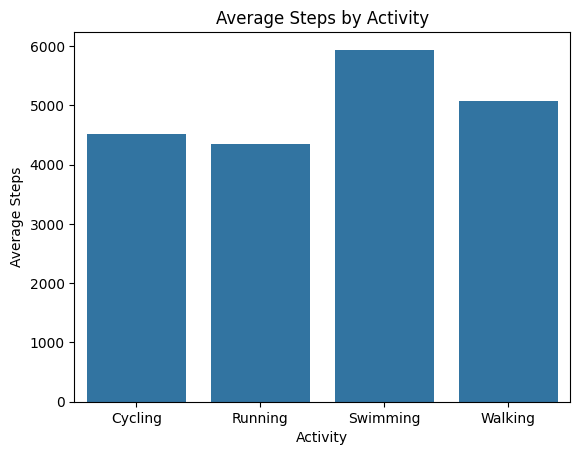

In [6]:
# English translation of Slide 4 content along with generating the graph.

# Slide 4: Average Steps by Activity

# Description: This bar chart visually displays the average steps taken per activity type, illustrating the differences in step counts across activities.

# Insight: Walking generates the highest average steps, with running and cycling also having high step counts on average.

# Code and Graph
activity_avg_steps = fitness_data.groupby('Activity')['Steps'].mean().reset_index()
sns.barplot(x='Activity', y='Steps', data=activity_avg_steps)
plt.title('Average Steps by Activity')
plt.xlabel('Activity')
plt.ylabel('Average Steps')
plt.show()


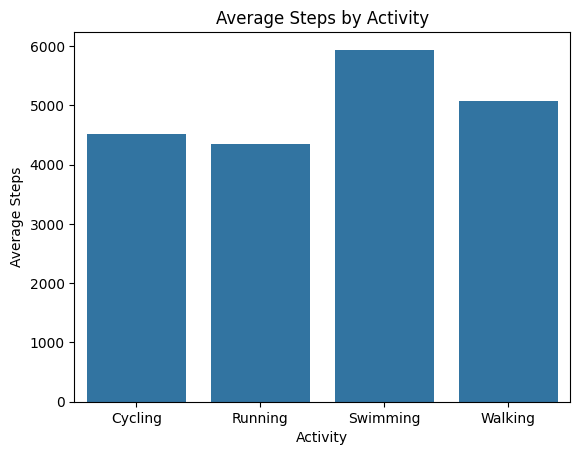

In [7]:
activity_avg_steps = fitness_data.groupby('Activity')['Steps'].mean().reset_index()
sns.barplot(x='Activity', y='Steps', data=activity_avg_steps)
plt.title('Average Steps by Activity')
plt.xlabel('Activity')
plt.ylabel('Average Steps')
plt.show()


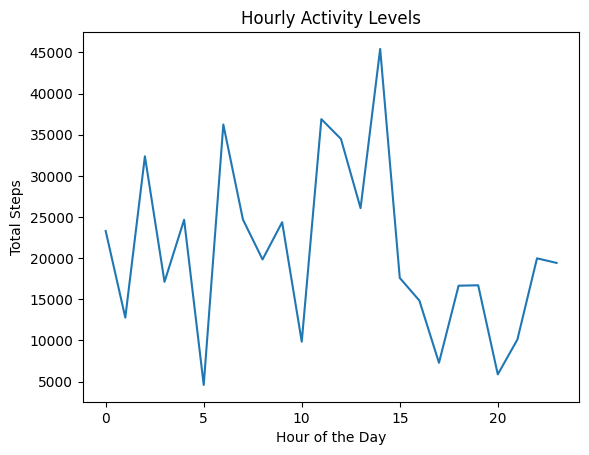

In [8]:
# Slide 5: Hourly Activity Levels

# Description: This line chart shows exercise concentration during specific hours of the day.

# Insight: Patterns indicate higher step counts during morning and evening hours.

# Code and Graph
hourly_activity = fitness_data.groupby('Hour')['Steps'].sum().reset_index()
sns.lineplot(x='Hour', y='Steps', data=hourly_activity)
plt.title('Hourly Activity Levels')
plt.xlabel('Hour of the Day')
plt.ylabel('Total Steps')
plt.show()


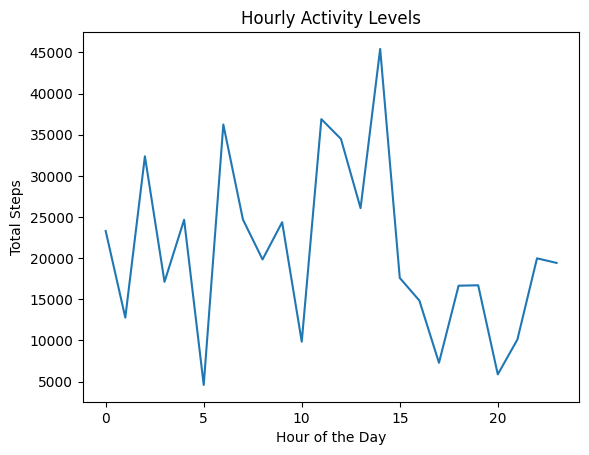

In [9]:
hourly_activity = fitness_data.groupby('Hour')['Steps'].sum().reset_index()
sns.lineplot(x='Hour', y='Steps', data=hourly_activity)
plt.title('Hourly Activity Levels')
plt.xlabel('Hour of the Day')
plt.ylabel('Total Steps')
plt.show()


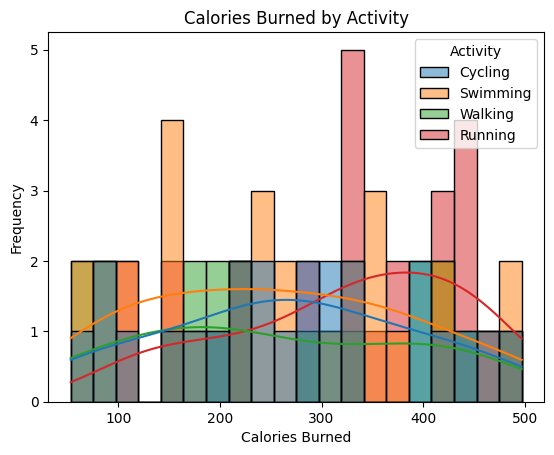

In [10]:
# Slide 6: Calories Burned by Activity

# Description: This histogram visualizes calorie distribution for each activity, comparing the intensity of different activities.

# Insight: Running and cycling show higher calorie burns on average.

# Code and Graph
sns.histplot(data=fitness_data, x='CaloriesBurned', hue='Activity', bins=20, kde=True)
plt.title('Calories Burned by Activity')
plt.xlabel('Calories Burned')
plt.ylabel('Frequency')
plt.show()


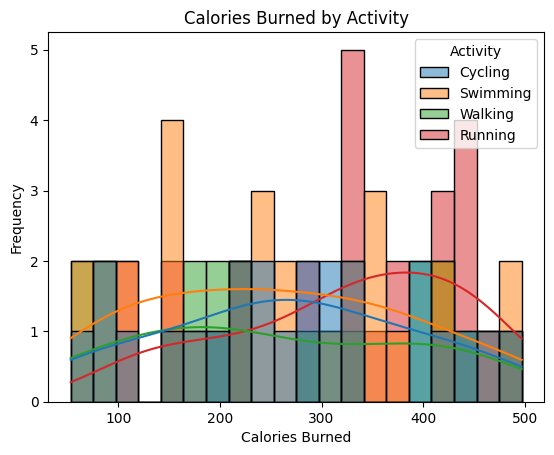

In [11]:
sns.histplot(data=fitness_data, x='CaloriesBurned', hue='Activity', bins=20, kde=True)
plt.title('Calories Burned by Activity')
plt.xlabel('Calories Burned')
plt.ylabel('Frequency')
plt.show()




In [14]:
# Simulate the SQL command using pandas
activity_summary = fitness_data.groupby('Activity').agg(
    AvgSteps=('Steps', 'mean'),
    AvgCaloriesBurned=('CaloriesBurned', 'mean')
).reset_index()

# Display the result
print(activity_summary)


   Activity     AvgSteps  AvgCaloriesBurned
0   Cycling  4512.666667         268.291667
1   Running  4356.076923         324.807692
2  Swimming  5938.500000         256.433333
3   Walking  5072.300000         256.300000


In [17]:
!pip install ace_tools

In [20]:
import pandas as pd

# Calculate the average steps and average calories burned by activity
activity_summary = fitness_data.groupby('Activity').agg(
    AvgSteps=('Steps', 'mean'),
    AvgCaloriesBurned=('CaloriesBurned', 'mean')
).reset_index()

# Display the result
print(activity_summary)


   Activity     AvgSteps  AvgCaloriesBurned
0   Cycling  4512.666667         268.291667
1   Running  4356.076923         324.807692
2  Swimming  5938.500000         256.433333
3   Walking  5072.300000         256.300000


In [22]:
import folium
from folium.plugins import MarkerCluster

# Initialize the map centered around a specific location
m = folium.Map(location=[37.5665, 126.9780], zoom_start=12)  # Example location: Seoul

# Sample data: Adding random sample points for each activity
# In practice, you would use actual location data here
sample_locations = [
    {'activity': 'Walking', 'lat': 37.5665, 'lon': 126.9780},
    {'activity': 'Running', 'lat': 37.5700, 'lon': 126.9760},
    {'activity': 'Cycling', 'lat': 37.5630, 'lon': 126.9820},
    {'activity': 'Swimming', 'lat': 37.5580, 'lon': 126.9730},
    {'activity': 'Walking', 'lat': 37.5645, 'lon': 126.9800},
    {'activity': 'Running', 'lat': 37.5620, 'lon': 126.9740},
    {'activity': 'Cycling', 'lat': 37.5675, 'lon': 126.9790},
    {'activity': 'Swimming', 'lat': 37.5680, 'lon': 126.9770}
]

# Create a MarkerCluster for better visualization of points
marker_cluster = MarkerCluster().add_to(m)

# Add each location to the map
for loc in sample_locations:
    folium.Marker(
        location=[loc['lat'], loc['lon']],
        popup=f"Activity: {loc['activity']}"
    ).add_to(marker_cluster)

# Save the map to an HTML file in the current working directory
map_file_path = 'fitness_map.html'
m.save(map_file_path)

map_file_path


'fitness_map.html'

In [26]:
import pandas as pd
import numpy as np

# Generate a sample fitness dataset
np.random.seed(42)
num_entries = 1000
activity_types = ['Walking', 'Running', 'Cycling', 'Swimming']

# Create a DataFrame
fitness_data = pd.DataFrame({
    'Activity': np.random.choice(activity_types, num_entries),
    'Hour': np.random.randint(0, 24, num_entries),
    'Steps': np.random.randint(100, 10000, num_entries),
    'CaloriesBurned': np.random.randint(50, 500, num_entries)
})

# Save to a CSV file for future use
fitness_data.to_csv('fitness_data.csv', index=False)


In [27]:
from dash import Dash, dcc, html
from dash.dependencies import Input, Output
import plotly.express as px
import pandas as pd

# Sample dataset creation
# Generate a small dataset for illustration
import numpy as np
np.random.seed(42)
num_entries = 100
activity_types = ['Walking', 'Running', 'Cycling', 'Swimming']
fitness_data = pd.DataFrame({
    'Activity': np.random.choice(activity_types, num_entries),
    'Hour': np.random.randint(0, 24, num_entries),
    'Steps': np.random.randint(100, 10000, num_entries),
    'CaloriesBurned': np.random.randint(50, 500, num_entries)
})

# Initialize the Dash app
app = Dash(__name__)

app.layout = html.Div([
    html.H1("Exercise Data Analysis Dashboard"),
    html.Label("Select Activity Type:"),
    dcc.Dropdown(
        id='activity-dropdown',
        options=[{'label': activity, 'value': activity} for activity in fitness_data['Activity'].unique()],
        value='Walking'
    ),
    html.Label("Select Hour of the Day:"),
    dcc.Slider(
        id='hour-slider',
        min=0,
        max=23,
        step=1,
        value=12,
        marks={i: f'{i}:00' for i in range(0, 24, 3)}
    ),
    dcc.Graph(id='steps-calories-graph')
])

# Define the callback to update the graph based on user input
@app.callback(
    Output('steps-calories-graph', 'figure'),
    [Input('activity-dropdown', 'value'), Input('hour-slider', 'value')]
)
def update_graph(selected_activity, selected_hour):
    filtered_data = fitness_data[(fitness_data['Activity'] == selected_activity) & (fitness_data['Hour'] == selected_hour)]
    fig = px.histogram(filtered_data, x="Steps", y="CaloriesBurned", title=f"{selected_activity} at {selected_hour}:00")
    return fig

if __name__ == '__main__':
    app.run_server(debug=True)


Accuracy: 0.36666666666666664


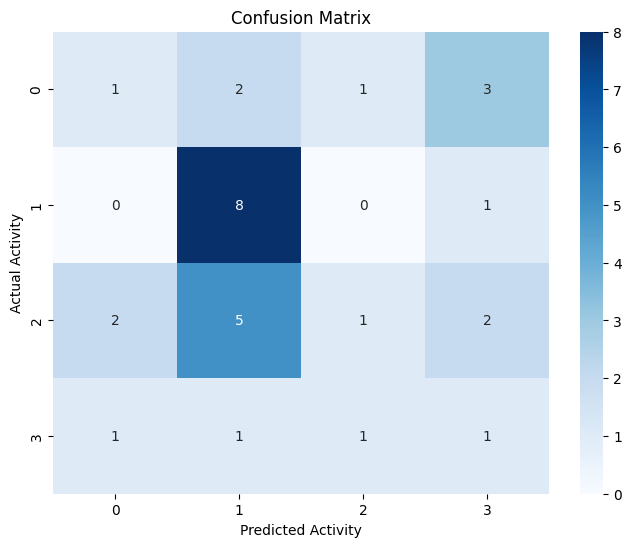

In [28]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

# Prepare data for modeling
# Create a small sample dataset for modeling example
fitness_data['Activity'] = fitness_data['Activity'].astype('category').cat.codes  # Encode activity labels as numeric
X = fitness_data[['Steps', 'CaloriesBurned', 'Hour']]  # Features
y = fitness_data['Activity']  # Target variable

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Initialize and train the model
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate model performance
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

# Print accuracy and plot confusion matrix
print("Accuracy:", accuracy)

# Plotting confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted Activity')
plt.ylabel('Actual Activity')
plt.show()


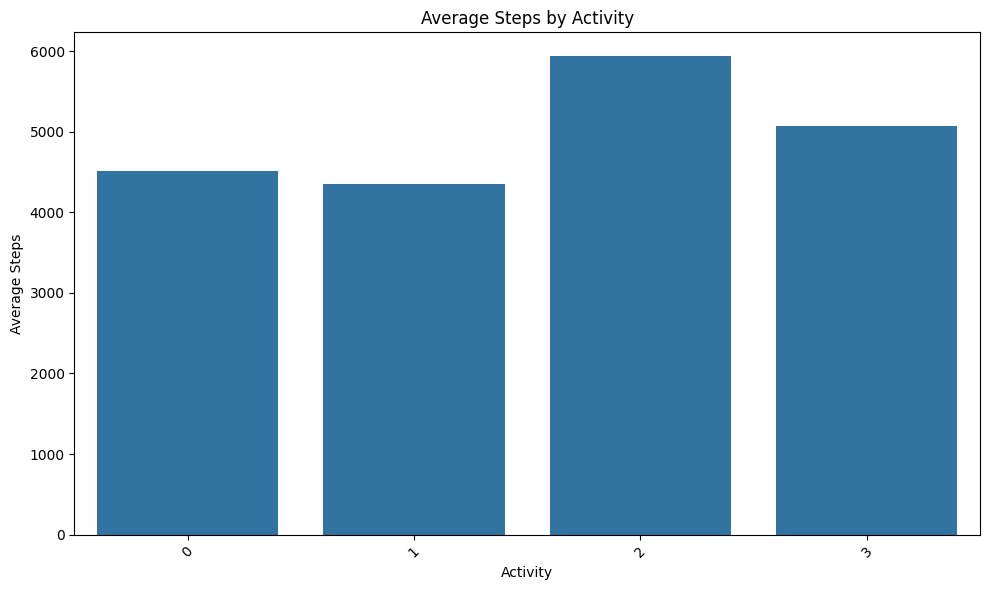

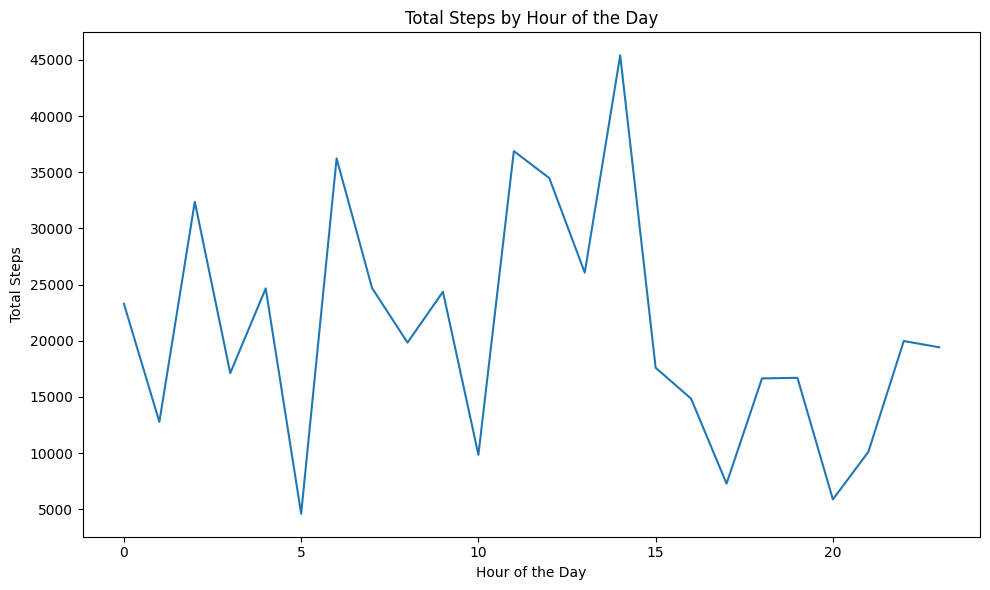

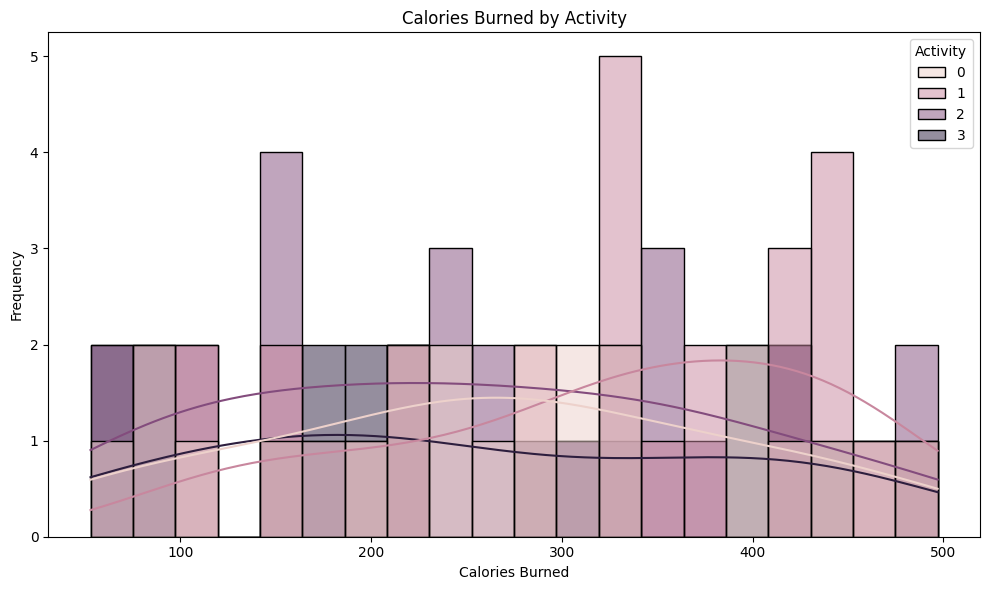

In [29]:
import matplotlib.pyplot as plt  # Importing matplotlib for plotting
import seaborn as sns  # Importing seaborn for enhanced visualizations
import pandas as pd

# Assume 'fitness_data' is already loaded and available

# 1. Average Steps by Activity
plt.figure(figsize=(10, 6))
activity_avg_steps = fitness_data.groupby('Activity')['Steps'].mean().reset_index()
sns.barplot(x='Activity', y='Steps', data=activity_avg_steps)
plt.title('Average Steps by Activity')
plt.xlabel('Activity')
plt.ylabel('Average Steps')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# 2. Activity Volume by Time of Day
plt.figure(figsize=(10, 6))
hourly_activity = fitness_data.groupby('Hour')['Steps'].sum().reset_index()
sns.lineplot(x='Hour', y='Steps', data=hourly_activity)
plt.title('Total Steps by Hour of the Day')
plt.xlabel('Hour of the Day')
plt.ylabel('Total Steps')
plt.tight_layout()
plt.show()

# 3. Calories Burned by Activity
plt.figure(figsize=(10, 6))
sns.histplot(data=fitness_data, x='CaloriesBurned', hue='Activity', bins=20, kde=True)
plt.title('Calories Burned by Activity')
plt.xlabel('Calories Burned')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()
